# Proyecto Series de Tiempo: Análisis Económico del estado de Jalisco (ODS8) $\bigstar$

Brenda Itzelt Gómez Catzín | itzeltgomezc@hotmail.com

### Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

## Limpieza Datos INGRESOS

### prueba

In [ ]:
data1990 = pd.read_csv(r"C:\Users\Coord-Personal\Documents\ITZELT\TEC\UNII\SEXTO_SEMESTRE\analisis_numerico\modulos\m1\Proyecto_SeriesTiempo\data\conjunto_de_datos\efipem_estatal_anual_tr_cifra_1990.csv")

In [ ]:
data1990['DESCRIPCION_CATEGORIA'].value_counts() 

* en este caso, solo nos enfocaremos en jalisco y total de ingresos, con la finalidad de hacer un análisis exploratorio inicial y luego incorporar los egresos, y otra variable de *superavit = ingresos_totales - egresos_totales* para analizar estas dinámicas financieras

In [ ]:
data1990 = data1990[(data1990["ID_ENTIDAD"] == 14) & (data1990["TEMA"] == "Ingresos") & (data1990['DESCRIPCION_CATEGORIA'] == "Total de ingresos")]

In [ ]:
data1990

,PROD_EST,COBERTURA,ANIO,ID_ENTIDAD,TEMA,CATEGORIA,DESCRIPCION_CATEGORIA,VALOR,ESTATUS
1029,Estadística de Finanzas Públicas Estatales y M...,Estatal,1990,14,Ingresos,Tema,Total de ingresos,2975977303,Cifras Definitivas


### Datos Completos 

* Loading data 

In [4]:
# definimos nuestra lista de años para los df 
years = [str(year) for year in range(1989, 2024)]
years


#dicc para guardar los datos 
data_dict = {}
 
for y in years:
    path = rf'C:\Users\Coord-Personal\Documents\ITZELT\TEC\UNII\SEXTO_SEMESTRE\analisis_numerico\modulos\m1\Proyecto_SeriesTiempo\data\conjunto_de_datos\efipem_estatal_anual_tr_cifra_{y}.csv'
    try: 
        data_dict[y] = pd.read_csv(path)
    except Exception as e:
        print(f"Error loading {y}: {e}")

In [16]:
# unimos en un solo df, como tosos siguen la misma estructura, los ponemos uno debajo del otro
df = pd.concat(data_dict.values(), ignore_index=True)


In [23]:
df

,PROD_EST,COBERTURA,ANIO,ID_ENTIDAD,TEMA,CATEGORIA,DESCRIPCION_CATEGORIA,VALOR,ESTATUS
0,Estadística de Finanzas Públicas Estatales y M...,Estatal,1989,1,Egresos,Tema,Total de egresos,188216767,Cifras Definitivas
1,Estadística de Finanzas Públicas Estatales y M...,Estatal,1989,1,Egresos,Capítulo,Servicios personales,23236402,Cifras Definitivas
2,Estadística de Finanzas Públicas Estatales y M...,Estatal,1989,1,Egresos,Concepto,Remuneraciones al personal,12946244,Cifras Definitivas
3,Estadística de Finanzas Públicas Estatales y M...,Estatal,1989,1,Egresos,Partida Genérica,Dependencias diversas,12946244,Cifras Definitivas
4,Estadística de Finanzas Públicas Estatales y M...,Estatal,1989,1,Egresos,Concepto,Remuneraciones adicionales y especiales,10290158,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...
238792,Estadística de Finanzas Públicas Estatales y M...,Estatal,2023,32,Ingresos,Subpartida Genérica,Diversos fondos del Ramo 23,17862560,Cifras Definitivas
238793,Estadística de Finanzas Públicas Estatales y M...,Estatal,2023,32,Ingresos,Subpartida Genérica,Convenio para la protección de los recursos na...,1452744,Cifras Definitivas
238794,Estadística de Finanzas Públicas Estatales y M...,Estatal,2023,32,Ingresos,Subpartida Genérica,Otros recursos federales,366854714,Cifras Definitivas
238795,Estadística de Finanzas Públicas Estatales y M...,Estatal,2023,32,Ingresos,Capítulo,Financiamiento,458278277,Cifras Definitivas


In [ ]:
# filtramos por entidad y solo ingresos
df_ingresos = df[(df["ID_ENTIDAD"] == 14) & (df["TEMA"] == "Ingresos") & (df['DESCRIPCION_CATEGORIA'] == "Total de ingresos")]

In [ ]:
print(df_ingresos.shape)

(35, 9)
(35, 9)


In [29]:
df_ingresos

,PROD_EST,COBERTURA,ANIO,ID_ENTIDAD,TEMA,CATEGORIA,DESCRIPCION_CATEGORIA,VALOR,ESTATUS
1018,Estadística de Finanzas Públicas Estatales y M...,Estatal,1989,14,Ingresos,Tema,Total de ingresos,2065455592,Cifras Definitivas
3490,Estadística de Finanzas Públicas Estatales y M...,Estatal,1990,14,Ingresos,Tema,Total de ingresos,2975977303,Cifras Definitivas
5961,Estadística de Finanzas Públicas Estatales y M...,Estatal,1991,14,Ingresos,Tema,Total de ingresos,2078147661,Cifras Definitivas
8526,Estadística de Finanzas Públicas Estatales y M...,Estatal,1992,14,Ingresos,Tema,Total de ingresos,6955531161,Cifras Definitivas
11067,Estadística de Finanzas Públicas Estatales y M...,Estatal,1993,14,Ingresos,Tema,Total de ingresos,8170185627,Cifras Definitivas
13617,Estadística de Finanzas Públicas Estatales y M...,Estatal,1994,14,Ingresos,Tema,Total de ingresos,10137713122,Cifras Definitivas
16267,Estadística de Finanzas Públicas Estatales y M...,Estatal,1995,14,Ingresos,Tema,Total de ingresos,11452228384,Cifras Definitivas
19037,Estadística de Finanzas Públicas Estatales y M...,Estatal,1996,14,Ingresos,Tema,Total de ingresos,5876814285,Cifras Definitivas
22024,Estadística de Finanzas Públicas Estatales y M...,Estatal,1997,14,Ingresos,Tema,Total de ingresos,10910453425,Cifras Definitivas
25535,Estadística de Finanzas Públicas Estatales y M...,Estatal,1998,14,Ingresos,Tema,Total de ingresos,15354357497,Cifras Definitivas


## Limpieza de datos PIB

In [226]:
data = pd.read_csv(r"C:\Users\Coord-Personal\Documents\ITZELT\TEC\UNII\SEXTO_SEMESTRE\analisis_numerico\modulos\m1\Proyecto_SeriesTiempo\data\PIB\conjunto_de_datos\conjunto_de_datos_pibe_entidad_jal2023_p.csv").T

In [227]:
data.columns = data.iloc[0] 
data = data.iloc[1:]

In [228]:
data = data.iloc[:-1]

In [229]:
data

Descriptores,Millones de pesos a precios de 2018|B.1bP---Producto interno bruto<C1>,"Millones de pesos a precios de 2018|D.21-D.31---Impuestos sobre los productos, netos",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total <C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|112---Cría y explotación de animales<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|114---Pesca, caza y captura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|113,115---Aprovechamiento forestal, Servicios relacionados con las actividades agropecuarias y forestales<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades secundarias<C1>,...,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|53---Servicios inmobiliarios y de alquiler de bienes muebles e intangibles<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|54---Servicios profesionales, científicos y técnicos<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|55---Corporativos<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|56---Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|61---Servicios educativos<C1>,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|62---Servicios de salud y de asistencia social<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|71---Servicios de esparcimiento culturales y deportivos, y otros servicios recreativos<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|72---Servicios de alojamiento temporal y de preparación de alimentos y bebidas<C1>,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|81---Otros servicios excepto actividades gubernamentales<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|93---Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales<C1>"
2003,1212171.197,89083.785,1123087.412,63782.62,63782.62,29360.455,32261.345,80.028,2080.792,364721.019,...,NaN,NaN,NaN,N

In [230]:
data.reset_index(inplace = True)

In [231]:
data.rename(columns = {'index': 'Año'}, inplace= True) 

In [232]:
data

Descriptores,Año,Millones de pesos a precios de 2018|B.1bP---Producto interno bruto<C1>,"Millones de pesos a precios de 2018|D.21-D.31---Impuestos sobre los productos, netos",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total <C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|112---Cría y explotación de animales<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|114---Pesca, caza y captura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|113,115---Aprovechamiento forestal, Servicios relacionados con las actividades agropecuarias y forestales<C1>",...,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|53---Servicios inmobiliarios y de alquiler de bienes muebles e intangibles<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|54---Servicios profesionales, científicos y técnicos<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|55---Corporativos<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|56---Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|61---Servicios educativos<C1>,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|62---Servicios de salud y de asistencia social<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|71---Servicios de esparcimiento culturales y deportivos, y otros servicios recreativos<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|72---Servicios de alojamiento temporal y de preparación de alimentos y bebidas<C1>,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|81---Otros servicios excepto actividades gubernamentales<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|93---Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales<C1>"
0,2003,1212171.197,89083.785,1123087.412,63782.62,63782.62,29360.455,32261.345,80.028,2080.792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,1246901.39,91195.52,1155705.87,71754.361,71754.361,36003.578,33320.35,108.389,2322.044,...,

* en este caso, solo nos importan las variables que son por sector pero que están expresadas en millones de pesos ya que nos dice cuánto aporta económicamente un sector en terminos reales (ya fue ajustado por inflación). En general, sirve para comparar el peso relativo de sectores o la evolución en el tiempo.

In [233]:
filtro = 'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total'
columnas_filtradas = [col for col in data.columns if filtro in col]

# agregamos el año
columnas_filtradas = ['Año'] + columnas_filtradas if 'Año' in data.columns else columnas_filtradas

data_filtrada = data[columnas_filtradas]

In [234]:
data_filtrada

Descriptores,Año,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total <C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|112---Cría y explotación de animales<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|114---Pesca, caza y captura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|113,115---Aprovechamiento forestal, Servicios relacionados con las actividades agropecuarias y forestales<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades secundarias<C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades secundarias|21---Minería<C1>,...,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|53---Servicios inmobiliarios y de alquiler de bienes muebles e intangibles<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|54---Servicios profesionales, científicos y técnicos<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|55---Corporativos<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|56---Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|61---Servicios educativos<C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|62---Servicios de salud y de asistencia social<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|71---Servicios de esparcimiento culturales y deportivos, y otros servicios recreativos<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|72---Servicios de alojamiento temporal y de preparación de alimentos y bebidas<C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|81---Otros servicios excepto actividades gubernamentales<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|93---Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales<C1>"
0,2003,1123087.412,63782.62,63782.62,29360.455,32261.345,80.028,2080.792,364721.019,3508.826,...,108904.256,22479.676,272.029,40682.394,48688.906,27653.459,7864.724,35605.003,33269.574,34479.206
1,2004,1155705.87,71754.361,71754.361,36003.578,33320.35,108.389,2322.044,367068.327,3169.513,...,112442.711,21335.434,265.433,43081.389,49540.2,27666.634,8016.458,33998.244,34562.803,34325.8
2,2005,1179123.909,68550.428,68550.

In [235]:
data.columns 

Index(['Año',
       'Millones de pesos a precios de 2018|B.1bP---Producto interno bruto<C1>',
       'Millones de pesos a precios de 2018|D.21-D.31---Impuestos sobre los productos, netos',
       'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  <C1>',
       'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades primarias<C1>',
       'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza<C1>',
       'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>',
       'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades primari

In [236]:
data_filtrada.rename(columns = {
    'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  <C1>': 'Valor_agregado_bruto_total',
    "Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>": 'agricultura',
    "Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades secundarias|31-33---Industrias manufactureras|312---Industria de las bebidas y del tabaco<C1>": 'bebidas_tabaco',
    "Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades terciarias|53---Servicios inmobiliarios y de alquiler de bienes muebles e intangibles<C1>": 'sector_inmobiliario',
    "Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades terciarias|54---Servicios profesionales, científicos y técnicos<C1>": "sector_cientifico"
}, inplace = True)

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_15088\3568000301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada.rename(columns = {


In [238]:
cols = ["Año",'Valor_agregado_bruto_total', 'agricultura', 'bebidas_tabaco', 'sector_inmobiliario', 'sector_cientifico']
data_filtrada[cols]

Descriptores,Año,Valor_agregado_bruto_total,agricultura,bebidas_tabaco,sector_inmobiliario,sector_cientifico
0,2003,1123087.412,29360.455,20709.818,108904.256,22479.676
1,2004,1155705.87,36003.578,22640.442,112442.711,21335.434
2,2005,1179123.909,34030.475,25123.721,115139.251,22461.864
3,2006,1239683.419,35670.423,26098.118,119618.101,23321.17
4,2007,1280271.291,40532.572,26596.654,123665.825,24732.118
5,2008,1300984.651,42381.606,30312.726,127783.976,28080.925
6,2009,1220828.37,31588.64,29738.597,129646.222,23544.389
7,2010,1298494.412,36073.251,30470.787,133863.343,24196.84
8,2011,1341965.239,36643.53,28589.499,137960.924,25752.485
9,2012,1393050.66,41912.273,31778.016,142049.649,25684.53


In [239]:
df_mm = data_filtrada.copy()

## Serie de tiempo 

* Visualizaciones iniciales

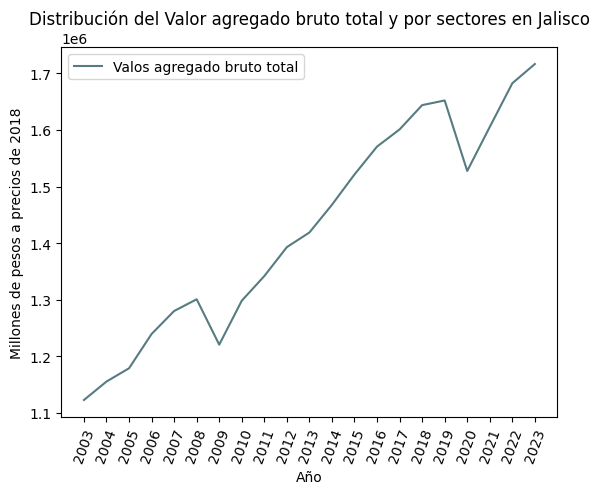

In [ ]:
# analizamos la serie (linplot de los años)
sns.lineplot(data = df_mm, x = "Año", y = "Valor_agregado_bruto_total", color = "#567b81", label = "Valor agregado bruto total")
plt.xlabel("Año")
plt.ylabel("Millones de pesos a precios de 2018")
plt.title("Distribución del Valor agregado bruto total y por sectores en Jalisco")
plt.xticks(rotation = 70)
plt.show();

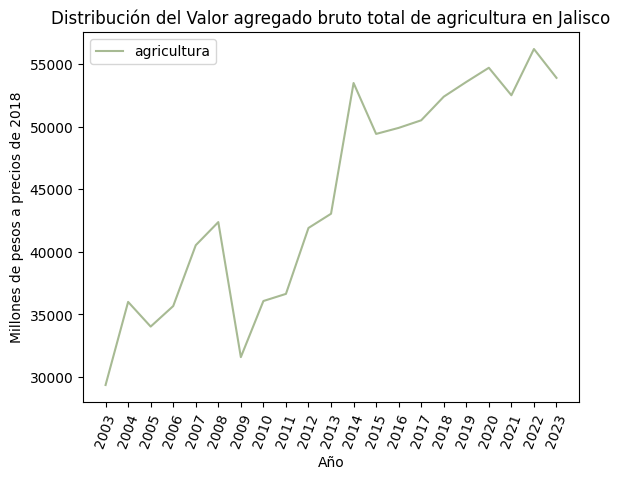

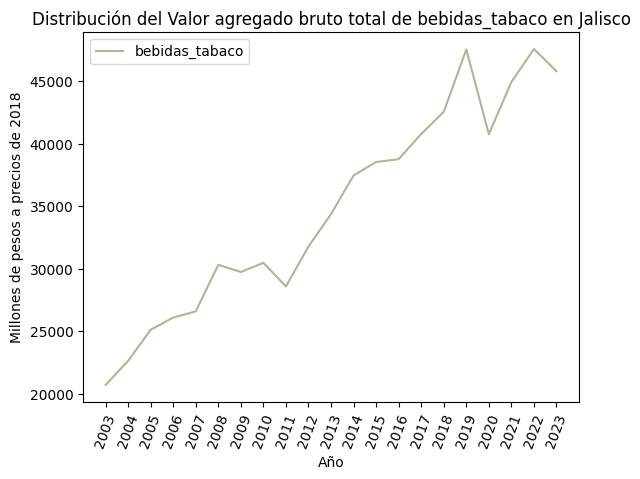

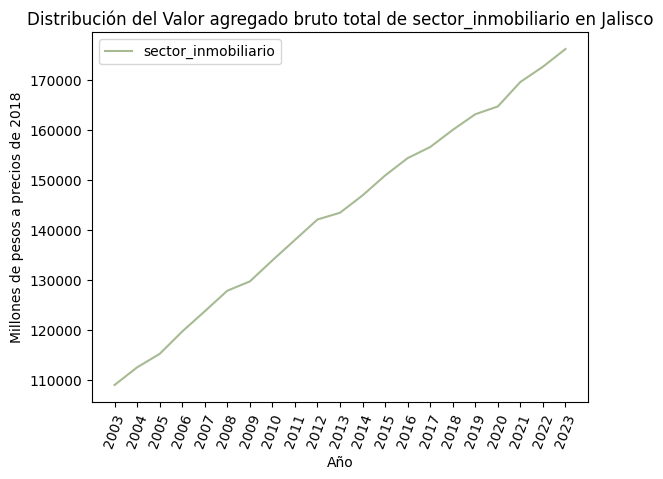

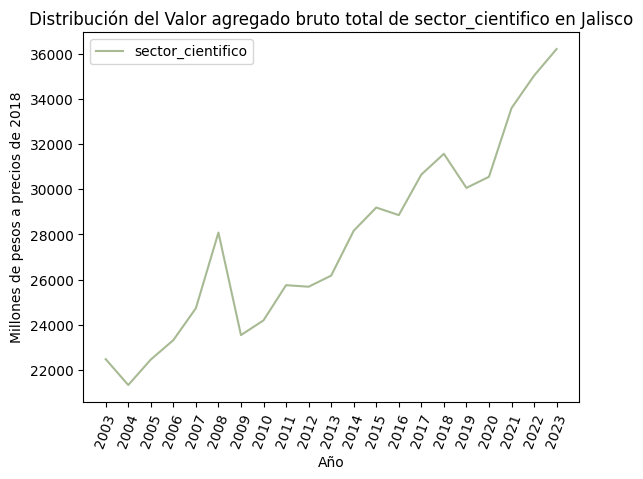

In [244]:
sector = ["agricultura", "bebidas_tabaco", "sector_inmobiliario", "sector_cientifico"]

for sec in sector:
    sns.lineplot(data = df_mm, x = "Año", y = sec, color = "#a7ba93", label = sec)
    #sns.lineplot(data = df_mm, x = "Año", y = "bebidas_tabaco", color = "#f9b97f", label = "Bebidas y tabaco")
    #sns.lineplot(data = df_mm, x = "Año", y = "sector_inmobiliario", color = "#fbdbbf", label = "Sector inmobiliario")
    #sns.lineplot(data = df_mm, x = "Año", y = "sector_cientifico", color = "#a7ba93", label = "Sector científico y técnico")
    plt.xlabel("Año")
    plt.ylabel("Millones de pesos a precios de 2018")
    plt.title(f"Distribución del Valor agregado bruto total de {sec} en Jalisco")
    plt.xticks(rotation = 70)
    plt.show();

* En la primer distribución, podemos ver dos cambios súbitos: 2008 y 2020, los cuales corresponden a los años de la crisis económica de la vivienda y el covid-19. Por otro lado, cuando hacemos la distribución por sectores, podemos ver cierta tendencia en todos nuestros sectores. Debemos de recordar que, si tenemos tendencia, por ende $\mu_t$ no es constante, lo cual contradice los supuestos de los procesos estacionarios. 

* Sin embargo, un gráfico no es suficiente para hacer conclusiones, por lo cual, debemos de aplicar pruebas estadísticas que nos ayude a la toma de decisiones. Para ello, aplicamos la prueba de Dickey-Fuller. 

### Agricultura

In [245]:
test_estacionalidad_agricultura = adfuller(df_mm["agricultura"])
print(f"Estadístico de prueba: {test_estacionalidad_agricultura[0]}")
print(f"Valor p: {test_estacionalidad_agricultura[1]}")

Estadístico de prueba: -0.8664739519419149
Valor p: 0.7988124892355031


¿cómo interpretamos esto?

* $H_{0}: \text{Existe raíz unitaria}$
* $H_{\alpha}: \text{No existe una raíz unitaria}$

buscamos rechazar nuestra hipótesis nula, ya que si no existen raíces unitarias entonces la series de tiempo es estacionaria


sin embargo, obtuvimos un p-value grande, lo cual nos indica que nuestra serie no es estacionaria, ¿cómo resolvemos esto? DIFERENCIANDO! 

In [246]:
agricultura_1 = np.diff(df_mm["agricultura"], n = 1)

In [247]:
# volvemos a aplicar la prueba de adfuller
test_estacionalidad_agricultura_1 = adfuller(agricultura_1)
print(f"Estadístico de prueba (diferenciado): {test_estacionalidad_agricultura_1[0]}")
print(f"Valor p (diferenciado): {test_estacionalidad_agricultura_1[1]}")

Estadístico de prueba (diferenciado): -6.18509089135949
Valor p (diferenciado): 6.317625422167596e-08


obtuvimos un p-value menor a 0.05, por lo que rechazamos nuestra hipotesis nula, y tenemos una serie estacionaria!! veamos la función de autocorrelación para analizar qué modelo nos conviene

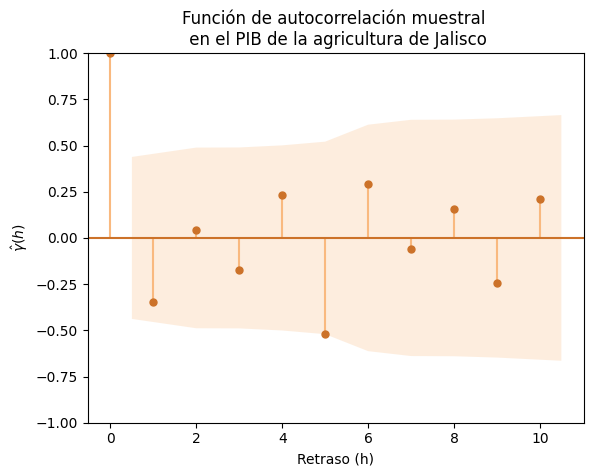

In [250]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots()
plot_acf(agricultura_1, vlines_kwargs = {"color": "#f9b97f"}, color = "#cc7229", ax = ax);
plt.xlabel("Retraso (h)")
plt.ylabel(r"$\hat{\gamma}(h)$")
plt.title("Función de autocorrelación muestral \n en el PIB de la agricultura de Jalisco")

for poly in ax.collections:
    poly.set_facecolor("#f9b97f")
plt.show();

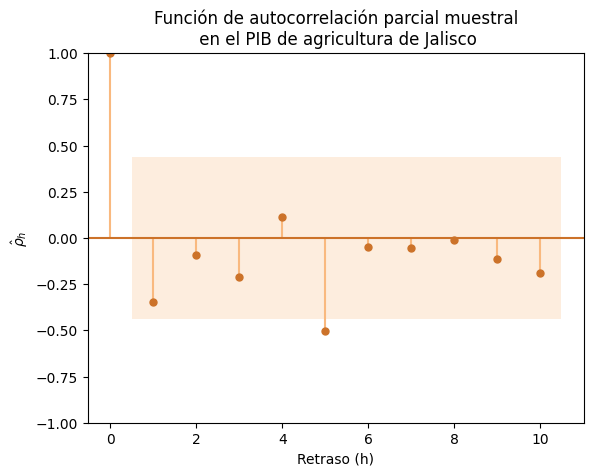

In [251]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots()
plot_pacf(agricultura_1, vlines_kwargs = {"color": "#f9b97f"}, color = "#cc7229", ax = ax);
plt.xlabel("Retraso (h)")
plt.ylabel(r"$\hat{\rho}_{h}$")
plt.title("Función de autocorrelación parcial muestral\n en el PIB de agricultura de Jalisco")

for poly in ax.collections:
    poly.set_facecolor("#f9b97f")
plt.show();

### Industria bebidas

In [252]:
test_estacionalidad_bebidas = adfuller(df_mm["bebidas_tabaco"])
print(f"Estadístico de prueba: {test_estacionalidad_bebidas[0]}")
print(f"Valor p: {test_estacionalidad_bebidas[1]}")

Estadístico de prueba: 0.19439773170509733
Valor p: 0.9719456235316576


no es estacionaria, entonces diferenciamos

In [ ]:
# tuvimos que diferencias la serie cuatro veces para que se volviera estacionaria
bebidas_4 = np.diff(df_mm["bebidas_tabaco"], n = 4)

In [266]:
test_estacionalidad_bebidas_4 = adfuller(bebidas_4)
print(f"Estadístico de prueba: {test_estacionalidad_bebidas_4[0]}")
print(f"Valor p: {test_estacionalidad_bebidas_4[1]}")

Estadístico de prueba: -5.0367034387386065
Valor p: 1.8765643805756466e-05


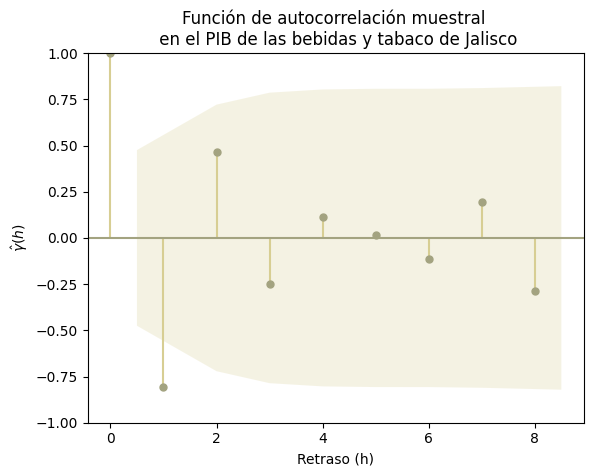

In [267]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots()
plot_acf(bebidas_4, vlines_kwargs = {"color": "#d7ce93"}, color = "#a3a380", ax = ax);
plt.xlabel("Retraso (h)")
plt.ylabel(r"$\hat{\gamma}(h)$")
plt.title("Función de autocorrelación muestral \n en el PIB de las bebidas y tabaco de Jalisco")

for poly in ax.collections:
    poly.set_facecolor("#d7ce93")
plt.show();

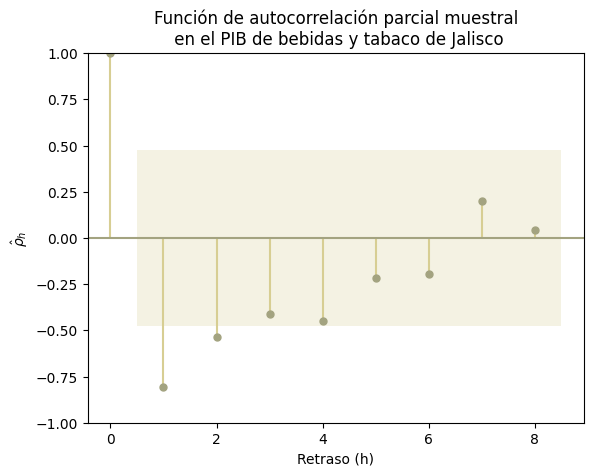

In [268]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots()
plot_pacf(bebidas_4, vlines_kwargs = {"color": "#d7ce93"}, color = "#a3a380", ax = ax);
plt.xlabel("Retraso (h)")
plt.ylabel(r"$\hat{\rho}_{h}$")
plt.title("Función de autocorrelación parcial muestral\n en el PIB de bebidas y tabaco de Jalisco")

for poly in ax.collections:
    poly.set_facecolor("#d7ce93")
plt.show();